In [1]:
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
rcParams['figure.figsize'] = 12,10

import seaborn as sb


In [131]:
train = pd.read_csv('C:/Hari Docs/Dataset/Loan_Pred_train.csv')
train['source'] = 'train'
test = pd.read_csv('C:/Hari Docs/Dataset/Loan_Pred_test.csv')
test['source'] = 'test'
print(train.shape)
print(test.shape)

(614, 14)
(367, 13)


In [132]:
df = pd.concat([train, test], ignore_index=True)
df.shape

(981, 14)

In [133]:
df.head()

,ApplicantIncome,CoapplicantIncome,Credit_History,Dependents,Education,Gender,LoanAmount,Loan_Amount_Term,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
0,5849,0.0,1.0,0,Graduate,Male,NaN,360.0,LP001002,Y,No,Urban,No,train
1,4583,1508.0,1.0,1,Graduate,Male,128.0,360.0,LP001003,N,Yes,Rural,No,train
2,3000,0.0,1.0,0,Graduate,Male,66.0,360.0,LP001005,Y,Yes,Urban,Yes,train
3,2583,2358.0,1.0,0,Not Graduate,Male,120.0,360.0,LP001006,Y,Yes,Urban,No,train
4,6000,0.0,1.0,0,Graduate,Male,141.0,360.0,LP001008,Y,No,Urban,No,train


In [58]:
df.describe()

,ApplicantIncome,CoapplicantIncome,Credit_History,LoanAmount,Loan_Amount_Term
count,981.000000,981.000000,902.000000,954.000000,961.000000
mean,5179.795107,1601.916330,0.835920,142.511530,342.201873
std,5695.104533,2718.772806,0.370553,77.421743,65.100602
min,0.000000,0.000000,0.000000,9.000000,6.000000
25%,2875.000000,0.000000,1.000000,100.000000,360.000000
50%,3800.000000,1110.000000,1.000000,126.000000,360.000000
75%,5516.000000,2365.000000,1.000000,162.000000,360.000000
max,81000.000000,41667.000000,1.000000,700.000000,480.000000


In [59]:
cat = df.dtypes[df.dtypes == 'object'].index
df[cat].describe()

,Dependents,Education,Gender,Loan_ID,Loan_Status,Married,Property_Area,Self_Employed,source
count,956,981,957,981,614,978,981,926,981
unique,4,2,2,981,2,2,3,2,2
top,0,Graduate,Male,LP001835,Y,Yes,Semiurban,No,train
freq,545,763,775,1,422,631,349,807,614


In [60]:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History        79
Dependents            25
Education              0
Gender                24
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                3
Property_Area          0
Self_Employed         55
source                 0
dtype: int64

In [134]:
df[(df['Married'] == 'Yes') & df['Dependents'].isnull()].count()

ApplicantIncome      13
CoapplicantIncome    13
Credit_History       12
Dependents            0
Education            13
Gender               13
LoanAmount           11
Loan_Amount_Term     12
Loan_ID              13
Loan_Status           8
Married              13
Property_Area        13
Self_Employed        13
source               13
dtype: int64

In [135]:
#Filling missing values of Married as 'Yes' where CoapplicantIncome == 0
miss_loc =(df['Married'].isnull()) & (df['CoapplicantIncome'] == 0)
print('Before', miss_loc.sum())
df.loc[miss_loc,'Married'] = df['Married'].fillna('No')
print('After', df['Married'].isnull().sum())

Before 2
After 1


In [136]:
df['Married'] = df['Married'].fillna('Yes')
print('After', df['Married'].isnull().sum())

After 0


In [137]:
#Imputing missing values for Gender based on coapplicant income lesser than applicantincome
miss_loc = ((df['ApplicantIncome'] > df['CoapplicantIncome']) & (df['CoapplicantIncome'] != 0) & (df['Gender'].isnull()))
print('No. of filled missing Gender ',miss_loc.sum())
df.loc[miss_loc,'Gender'] = df['Gender'].fillna('Male')
df['Gender'].isnull().sum()

No. of filled missing Gender  8


16

In [138]:
#Imputing missing values for Gender based on coapplicant income greater than applicantincome
miss_loc = ((df['ApplicantIncome'] < df['CoapplicantIncome']) & (df['CoapplicantIncome'] != 0) & (df['Gender'].isnull()))
print('No. of filled missing Gender ',miss_loc.sum())
df.loc[miss_loc,'Gender'] = df['Gender'].fillna('Female')
df['Gender'].isnull().sum()

No. of filled missing Gender  6


10

In [98]:
df.to_csv('C:/Hari Docs/Dataset/Loan_Pred_Stage.csv', index= False)

In [139]:
#Remaining missing Gender has coapplicantincome as '0'. Hence imputing the values as Male
miss_loc_m = ((df['CoapplicantIncome'] ==0) & (df['Gender'].isnull()))
print (miss_loc_m.sum())
df.loc[miss_loc_m,'Gender'] = df['Gender'].fillna('Male')
print(df['Gender'].isnull().sum())

10
0


In [140]:
df['Married'].isnull().sum()
#df['Married'].fillna('Yes', inplace= True)

0

In [141]:
#Imputing Self-Employed
df['Self_Employed'].value_counts()


No     807
Yes    119
Name: Self_Employed, dtype: int64

In [142]:
#Since majority is No, we will use the same
df['Self_Employed'].fillna('No', inplace = True)
df['Self_Employed'].value_counts()

No     862
Yes    119
Name: Self_Employed, dtype: int64

In [73]:
df.isnull().sum()

ApplicantIncome        0
CoapplicantIncome      0
Credit_History         0
Dependents             0
Education              0
Gender                 0
LoanAmount            27
Loan_Amount_Term      20
Loan_ID                0
Loan_Status          367
Married                0
Property_Area          0
Self_Employed          0
source                 0
dtype: int64

In [143]:
#Imputing Credit History with the assumption 0 = Bad Credit History; 1 = Good Credit History; 2 = No Credit History (blanks)
#Missing constitutes 8% of total data hence safe to assume th
print (df['Credit_History'].isnull().sum())
df['Credit_History'].fillna(2, inplace = True)
print (df['Credit_History'].isnull().sum())

79
0


In [17]:
#Imputing Dependents based on mode of Dependents for Married = Yes and remaining as 
df.groupby('Education')['Dependents'].agg(lambda x: x.value_counts().index[0])

Education
Graduate        0
Not Graduate    0
Name: Dependents, dtype: object

In [144]:
#By any grouping the mode for dependents seems to be 0. Hence imputing 0 directly.
print (df['Dependents'].isnull().sum())
df['Dependents'].fillna(0, inplace = True)
print (df['Dependents'].isnull().sum())

25
0


In [19]:
df['Loan_Amount_Term'].value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [145]:
#Classifying the Loan amount terms which is in months into years and grouping them as 10, 20, 30 and 40yrs respectively
df['Loan_Amount_Term'] = pd.cut(df['Loan_Amount_Term'], (6, 120, 240, 360, 480), labels=[10,20,30,40], include_lowest=True)
df['Loan_Amount_Term'].value_counts()

30    844
20     74
40     23
10     20
Name: Loan_Amount_Term, dtype: int64

In [22]:
df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'Credit_History', 'Dependents',
       'Education', 'Gender', 'LoanAmount', 'Loan_Amount_Term', 'Loan_ID',
       'Loan_Status', 'Married', 'Property_Area', 'Self_Employed', 'source'],
      dtype='object')

In [146]:
#2 rows of applicant income is 0, hence taking mean of applicant income and imputing them.
df['ApplicantIncome'].replace(0,df['ApplicantIncome'].mean(), inplace = True)

In [147]:
#Adding new column TotalIncome by adding ApplicantIncome and CoapplicantIncome
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']

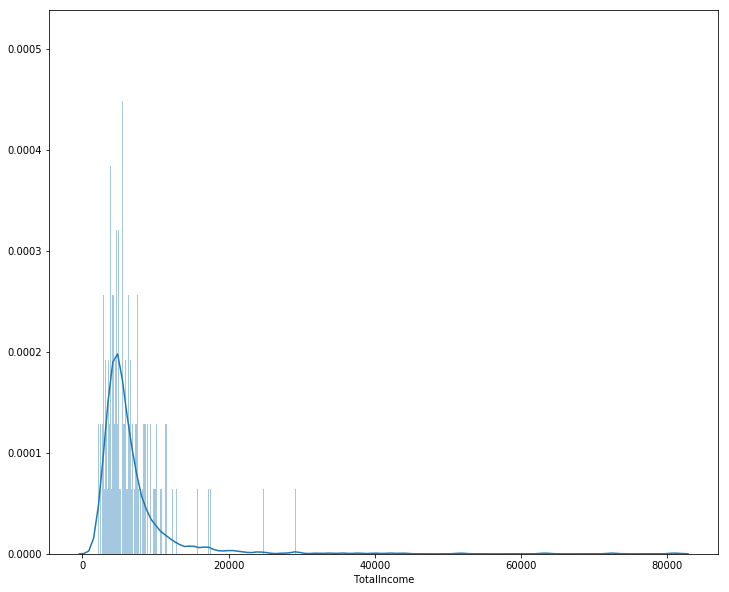

In [76]:
sb.distplot(df['TotalIncome'], bins = 5000)

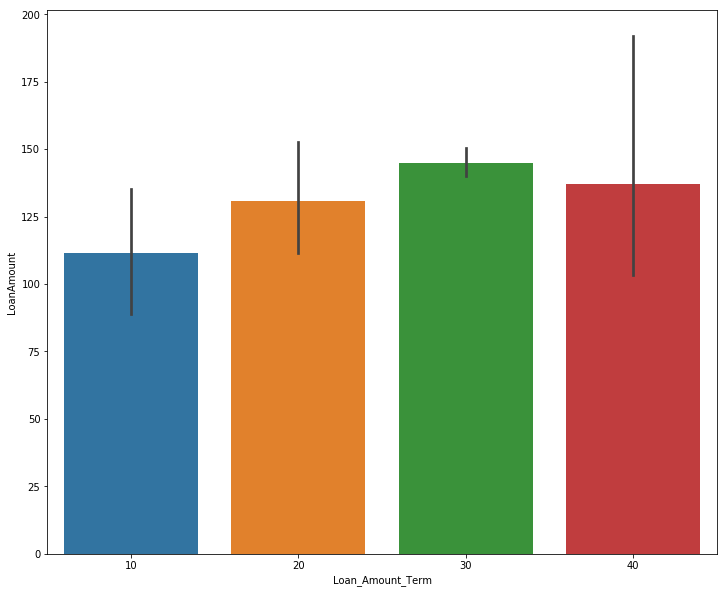

In [77]:
sb.barplot(x = 'Loan_Amount_Term', y = 'LoanAmount', data=df)

In [148]:
#Imputing Loan term based on mode.
mode = df['Loan_Amount_Term'].mode().iloc[0]
df['Loan_Amount_Term'].isnull().sum()
df['Loan_Amount_Term'].fillna(mode, inplace = True) 
df['Loan_Amount_Term'].isnull().sum()

0

In [80]:
#Building a Linear Regression model to fill predict LoanAmount values and fill the missing values.
#Creating a new dataframe for the same
df_la = df.iloc[:,[2,3,4,5,6,7,10,11,12,14]].copy(deep=True)
print(df_la.head())
print(df_la.shape)

   Credit_History Dependents     Education Gender  LoanAmount  \
0             1.0          0      Graduate   Male         NaN   
1             1.0          1      Graduate   Male       128.0   
2             1.0          0      Graduate   Male        66.0   
3             1.0          0  Not Graduate   Male       120.0   
4             1.0          0      Graduate   Male       141.0   

  Loan_Amount_Term Married Property_Area Self_Employed  TotalIncome  
0               30      No         Urban            No       5849.0  
1               30     Yes         Rural            No       6091.0  
2               30     Yes         Urban           Yes       3000.0  
3               30     Yes         Urban            No       4941.0  
4               30      No         Urban            No       6000.0  
(981, 10)


In [149]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder()

In [160]:
df.to_csv('C:/Hari Docs/Dataset/Loan_Pred_traintest_cleaned.csv', index= False)

In [171]:
df = pd.read_csv('C:/Hari Docs/Dataset/Loan_Pred_traintest_cleaned.csv')
df.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_ID,Loan_Status,source,TotalIncome,Credit_History_0,Credit_History_1,Credit_History_2,...,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Married_0,Married_1,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1
0,5849.0,0.0,NaN,LP001002,Y,train,5849.0,0,1,0,...,0,1,0,1,0,0,0,1,1,0
1,4583.0,1508.0,128.0,LP001003,N,train,6091.0,0,1,0,...,0,1,0,0,1,1,0,0,1,0
2,3000.0,0.0,66.0,LP001005,Y,train,3000.0,0,1,0,...,0,1,0,0,1,0,0,1,0,1
3,2583.0,2358.0,120.0,LP001006,Y,train,4941.0,0,1,0,...,0,1,0,0,1,0,0,1,1,0
4,6000.0,0.0,141.0,LP001008,Y,train,6000.0,0,1,0,...,0,1,0,1,0,0,0,1,1,0


In [158]:
#Label encoding
conv = ['Credit_History','Dependents','Education','Gender','Loan_Amount_Term','Married','Property_Area','Self_Employed']
for i in conv:
    df[i] = lc.fit_transform(df[i])

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 15 columns):
ApplicantIncome      981 non-null float64
CoapplicantIncome    981 non-null float64
Credit_History       981 non-null int64
Dependents           981 non-null int64
Education            981 non-null int64
Gender               981 non-null int64
LoanAmount           954 non-null float64
Loan_Amount_Term     981 non-null int64
Loan_ID              981 non-null object
Loan_Status          614 non-null object
Married              981 non-null int64
Property_Area        981 non-null int64
Self_Employed        981 non-null int64
source               981 non-null object
TotalIncome          981 non-null float64
dtypes: float64(4), int64(8), object(3)
memory usage: 115.0+ KB


In [165]:
#One hot encoding
df = pd.get_dummies(df, columns=conv)
df.dtypes

ApplicantIncome       float64
CoapplicantIncome     float64
LoanAmount            float64
Loan_Status            object
source                 object
TotalIncome           float64
Credit_History_0        uint8
Credit_History_1        uint8
Credit_History_2        uint8
Dependents_0            uint8
Dependents_1            uint8
Dependents_2            uint8
Dependents_3            uint8
Education_0             uint8
Education_1             uint8
Gender_0                uint8
Gender_1                uint8
Loan_Amount_Term_0      uint8
Loan_Amount_Term_1      uint8
Loan_Amount_Term_2      uint8
Loan_Amount_Term_3      uint8
Married_0               uint8
Married_1               uint8
Property_Area_0         uint8
Property_Area_1         uint8
Property_Area_2         uint8
Self_Employed_0         uint8
Self_Employed_1         uint8
dtype: object

In [172]:
df = df.drop('Loan_ID', axis=1)
df.shape

(981, 28)

In [173]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn import model_selection
from sklearn import cross_validation, metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from math import sqrt

from sklearn.ensemble import RandomForestRegressor

In [174]:
#df_la_train.iloc[:,1:].columns
train.columns
predictors = ['ApplicantIncome', 'CoapplicantIncome', 'TotalIncome', 'Credit_History_0', 'Credit_History_1',
       'Credit_History_2', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_0', 'Education_1', 'Gender_0', 'Gender_1',
       'Loan_Amount_Term_0', 'Loan_Amount_Term_1', 'Loan_Amount_Term_2',
       'Loan_Amount_Term_3', 'Married_0', 'Married_1', 'Property_Area_0',
       'Property_Area_1', 'Property_Area_2', 'Self_Employed_0',
       'Self_Employed_1']
target = ['LoanAmount']

In [180]:
test = df[(df['LoanAmount'].isnull())]
print(test.shape)
train = df[(df['LoanAmount'].notnull())]
print(train.shape)

(27, 28)
(954, 28)


In [181]:
lin_reg = LinearRegression(normalize=True)
#Fitting the model
lin_reg.fit(train[predictors], train[target])
#Predict training set
lm_predict = lin_reg.predict(train[predictors])
conf = lin_reg.score(train[predictors], train[target])
print('Confidence Score: ', conf)

Confidence Score:  0.39440838127


In [186]:
#Perform cross-validation:
cv_score = cross_validation.cross_val_score(lin_reg, train[predictors], train[target], cv=20, scoring='mean_squared_error')
cv_score = np.sqrt(np.abs(cv_score))

print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(train[target].values, lm_predict)))

print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))

RMSE : 60.22
CV Score : Mean - 60.83 | Std - 16.09 | Min - 35.55 | Max - 94.97


C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in version 0.18 and will be removed in 0.20.
  sample_weight=sample_weight)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\scorer.py:100: DeprecationWarning: Scoring method mean_squared_error was renamed to neg_mean_squared_error in versi

In [189]:
test[target] = lin_reg.predict(test[predictors])
test.head(15)

C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Status,source,TotalIncome,Credit_History_0,Credit_History_1,Credit_History_2,Dependents_0,...,Loan_Amount_Term_1,Loan_Amount_Term_2,Loan_Amount_Term_3,Married_0,Married_1,Property_Area_0,Property_Area_1,Property_Area_2,Self_Employed_0,Self_Employed_1
0,5849.0,0.0,117.0,Y,train,5849.0,0,1,0,1,...,0,1,0,1,0,0,0,1,1,0
35,2275.0,2067.0,120.0,Y,train,4342.0,0,1,0,1,...,0,1,0,0,1,0,0,1,1,0
63,4945.0,0.0,155.0,N,train,4945.0,1,0,0,0,...,0,1,0,0,1,1,0,0,1,0
81,2395.0,0.0,135.0,Y,train,2395.0,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
95,6782.0,0.0,130.0,N,train,6782.0,0,0,1,1,...,0,1,0,1,0,0,0,1,1,0
102,13650.0,0.0,189.0,Y,train,13650.0,0,1,0,1,...,0,1,0,0,1,0,0,1,1,0
103,4652.0,3583.0,155.0,Y,train,8235.0,0,1,0,1,...,0,1,0,0,1,0,1,0,1,0
113,7451.0,0.0,153.0,Y,train,7451.0,0,1,0,0,...,0,1,0,1,0,0,1,0,0,1
127,3865.0,1640.0,129.0,Y,train,5505.0,0,1,0,1,...,0,1,0,1,0,1,0,0,1,0
202,3992.0,0.0,92.0,N,train,3992.0,0,1,0,0,...,1,0,0,0,1,0,0,1,1,0


In [191]:
df = pd.concat([train, test], ignore_index=True)
print(train.shape, test.shape, df.shape)

(954, 28) (27, 28) (981, 28)


In [192]:
df.isnull().sum()

ApplicantIncome         0
CoapplicantIncome       0
LoanAmount              0
Loan_Status           367
source                  0
TotalIncome             0
Credit_History_0        0
Credit_History_1        0
Credit_History_2        0
Dependents_0            0
Dependents_1            0
Dependents_2            0
Dependents_3            0
Education_0             0
Education_1             0
Gender_0                0
Gender_1                0
Loan_Amount_Term_0      0
Loan_Amount_Term_1      0
Loan_Amount_Term_2      0
Loan_Amount_Term_3      0
Married_0               0
Married_1               0
Property_Area_0         0
Property_Area_1         0
Property_Area_2         0
Self_Employed_0         0
Self_Employed_1         0
dtype: int64

In [193]:
#Dividing back into test and train dataset
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']
print('train:', train.shape)
print('test:', test.shape)

train: (614, 28)
test: (367, 28)


In [194]:
train.to_csv('C:/Hari Docs/Dataset/Loan_Pred_train_cleaned.csv', index= False)
test.to_csv('C:/Hari Docs/Dataset/Loan_Pred_test_cleaned.csv', index= False)

In [197]:
test.drop(['source'], axis = 1, inplace=True)
train.drop(['source'], axis = 1, inplace=True)

C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [198]:
print('train:', train.shape)
print('test:', test.shape)
train.columns

train: (614, 27)
test: (367, 27)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Status',
       'TotalIncome', 'Credit_History_0', 'Credit_History_1',
       'Credit_History_2', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_0', 'Education_1', 'Gender_0', 'Gender_1',
       'Loan_Amount_Term_0', 'Loan_Amount_Term_1', 'Loan_Amount_Term_2',
       'Loan_Amount_Term_3', 'Married_0', 'Married_1', 'Property_Area_0',
       'Property_Area_1', 'Property_Area_2', 'Self_Employed_0',
       'Self_Employed_1'],
      dtype='object')

In [199]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [200]:
predictors = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','TotalIncome', 'Credit_History_0', 'Credit_History_1',
       'Credit_History_2', 'Dependents_0', 'Dependents_1', 'Dependents_2',
       'Dependents_3', 'Education_0', 'Education_1', 'Gender_0', 'Gender_1',
       'Loan_Amount_Term_0', 'Loan_Amount_Term_1', 'Loan_Amount_Term_2',
       'Loan_Amount_Term_3', 'Married_0', 'Married_1', 'Property_Area_0',
       'Property_Area_1', 'Property_Area_2', 'Self_Employed_0',
       'Self_Employed_1']
target = ['Loan_Status']

In [201]:
#Test options and evaluation metric
seed = 7
scoring = 'accuracy'

In [202]:
#Spot check algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    cv_results = model_selection.cross_val_score(model, train[predictors], train[target], cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A colu

LR: 0.809598 (0.034105)
LDA: 0.806346 (0.035088)
KNN: 0.620624 (0.038974)


C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\li

CART: 0.716843 (0.052074)
NB: 0.791750 (0.036301)


C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A colu

SVM: 0.689027 (0.052541)


C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\hmindi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
